In [1]:
import numpy as np

from uncertainties import ufloat
from uncertainties import umath

from astropy import units as u
from astropy.units import astrophys as astru

In [2]:
T = ufloat(10, 2) ** 2
T

100.0+/-40.0

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap
from synthesis import hvc_looper as hvcl, magnetic_field_derivation as mfd

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", override_RMs=True)

#print("")

#hvc = snap.take_snapshot(1, collated_data["RMs"], collated_data["HVCs"], collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"], rm_load_file="../data_processed/hvc_rms/hvc_rms_index_1")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [2]:
#hvcl.add_magnetic_field_RMs(collated_data)

from astropy.table import vstack

master_rm = hvcl.load_HVCs(collated_data, hvc_indicies=[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 22, 24])
#master_rm_flat = vstack(master_rm)

#B_virtual = mfd.get_magnetic_field_HVC(hvc)
#B_virtual

=== HVC RM LOADER ===
Taking HVC snapshots
Process complete


In [3]:
master_rm[-2]

{'index': 22,
 'corners': [<SkyCoord (Galactic): (l, b) in deg
      (295.4268104, -84.36769088)>,
  <SkyCoord (Galactic): (l, b) in deg
      (300.62681021, -79.16769107)>,
  <SkyCoord (Galactic): (l, b) in deg
      (298.02681031, -81.76769098)>],
 'HI_pixel_corners': [[775, 66], [713, 128], [744, 97]],
 'H-alpha': array([[0.48510742, 0.4790039 , 0.4729004 , ..., 0.6904297 , 0.6879883 ,
         0.6855469 ],
        [0.41748047, 0.41271973, 0.40771484, ..., 0.86621094, 0.8598633 ,
         0.85375977],
        [0.399292  , 0.40441895, 0.4095459 , ..., 0.85839844, 0.8564453 ,
         0.8544922 ],
        ...,
        [0.1609497 , 0.20428467, 0.24725342, ..., 0.5317383 , 0.53344727,
         0.51293945],
        [0.1000061 , 0.1000061 , 0.10778809, ..., 0.446167  , 0.45458984,
         0.4527588 ],
        [0.1000061 , 0.1000061 , 0.1000061 , ..., 0.44702148, 0.4645996 ,
         0.47888184]], dtype=float32),
 'HI': array([[17.797203, 17.387287, 17.043509, ...,       nan,       nan,
 

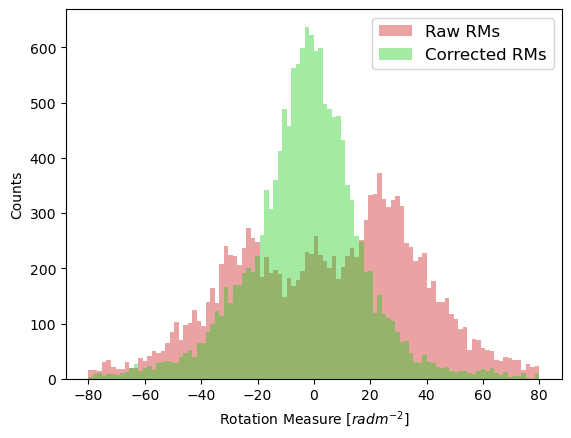

In [9]:
import matplotlib.pyplot as plt
from plotting import honours_plot as hplt

hplt.plot_3hist(master_rm_flat["RM"], master_rm_flat["RM"]-master_rm_flat["interpolation_raw"], master_rm_flat["interpolation_raw"], "Raw RMs", "Corrected RMs", "", "", (-80, 80), xlabel=r"Rotation Measure [$rad m^{-2}$]", ylabel="Counts", legend_size=12) # Virtual (single-point) magnetic field profile of filtered HVCs